In [1]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

# sums up cell areas or given runoff volume along the flow directions
from landlab.components import FlowAccumulator
# fills depressions along the flow path
from landlab.components import DepressionFinderAndRouter
# reports drainage area or flow volume of a grid
from landlab.components.flow_accum import find_drainage_area_and_discharge

from landlab.utils import watershed

In [2]:
(mg_m14_20201203_lidar,z_m14_20201203_lidar) = read_esri_ascii("m14/wsyr1/m14_20201203_lidar.asc", \
    name='topographic__elevation')

(mg_m14_20201203_sfm,z_m14_20201203_sfm) = read_esri_ascii("m14/wsyr1/m14_20201203_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20210224_sfm,z_m14_20210224_sfm) = read_esri_ascii("m14/wsyr1/m14_20210224_sfm.asc", \
    name='topographic__elevation')

# (mg_m14_20220324_sfm,z_m14_20220324_sfm) = read_esri_ascii("m14/wsyr2/m14_20220324_sfm.asc", \
#     name='topographic__elevation')

# (mg_m14_20220411_sfm,z_m14_20220411_sfm) = read_esri_ascii("m14/wsyr2/m14_20220411_sfm.asc", \
#     name='topographic__elevation')

# (mg_m14_20220428_sfm,z_m14_20220428_sfm) = read_esri_ascii("m14/wsyr2/m14_20220428_sfm.asc", \
#     name='topographic__elevation')

# (mg_m14_20220601_sfm,z_m14_20220601_sfm) = read_esri_ascii("m14/wsyr2/m14_20220601_sfm.asc", \
#     name='topographic__elevation')

In [3]:
mg_m14_20201203_lidar.status_at_node[z_m14_20201203_lidar == -9999] = mg_m14_20201203_lidar.BC_NODE_IS_FIXED_VALUE
mg_m14_20201203_sfm.status_at_node[z_m14_20201203_sfm == -9999] = mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20210224_sfm.status_at_node[z_m14_20210224_sfm == -9999] = mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE

# mg_m14_20220324_sfm.set_nodata_nodes_to_closed(z_m14_20220324_sfm, -9999)
# mg_m14_20220411_sfm.set_nodata_nodes_to_closed(z_m14_20220411_sfm, -9999)
# mg_m14_20220428_sfm.set_nodata_nodes_to_closed(z_m14_20220428_sfm, -9999)
# mg_m14_20220601_sfm.set_nodata_nodes_to_closed(z_m14_20220601_sfm, -9999)

In [4]:
fa_m14_20201203_lidar = FlowAccumulator(mg_m14_20201203_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20201203_sfm = FlowAccumulator(mg_m14_20201203_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20210224_sfm = FlowAccumulator(mg_m14_20210224_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

# fa_m14_20220324_sfm = FlowAccumulator(mg_m14_20220324_sfm,
#                      surface='topographic__elevation',
#                      flow_director='FlowDirectorD8',
#                      runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
#                      depression_finder='DepressionFinderAndRouter')

# fa_m14_20220411_sfm = FlowAccumulator(mg_m14_20220411_sfm,
#                      surface='topographic__elevation',
#                      flow_director='FlowDirectorD8',
#                      runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
#                      depression_finder='DepressionFinderAndRouter')

# fa_m14_20220428_sfm = FlowAccumulator(mg_m14_20220428_sfm,
#                      surface='topographic__elevation',
#                      flow_director='FlowDirectorD8',
#                      runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
#                      depression_finder='DepressionFinderAndRouter')

# fa_m14_20220601_sfm = FlowAccumulator(mg_m14_20220601_sfm,
#                      surface='topographic__elevation',
#                      flow_director='FlowDirectorD8',
#                      runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
#                      depression_finder='DepressionFinderAndRouter')

In [5]:
(da_m14_20201203_lidar, discharge_m14_20201203_lidar) = fa_m14_20201203_lidar.accumulate_flow()
(da_m14_20201203_sfm, discharge_m14_20201203_sfm) = fa_m14_20201203_sfm.accumulate_flow()
(da_m14_20210224_sfm, discharge_m14_20210224_sfm) = fa_m14_20210224_sfm.accumulate_flow()
# (da_m14_20220324_sfm, discharge_m14_20220324_sfm) = fa_m14_20220324_sfm.accumulate_flow()
# (da_m14_20220411_sfm, discharge_m14_20220411_sfm) = fa_m14_20220411_sfm.accumulate_flow()
# (da_m14_20220428_sfm, discharge_m14_20220428_sfm) = fa_m14_20220428_sfm.accumulate_flow()
# (da_m14_20220601_sfm, discharge_m14_20220601_sfm) = fa_m14_20220601_sfm.accumulate_flow()

In [6]:
mg_m14_20201203_lidar.at_node['drainage_area'][mg_m14_20201203_lidar.status_at_node==mg_m14_20201203_lidar.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20201203_sfm.at_node['drainage_area'][mg_m14_20201203_sfm.status_at_node==mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20210224_sfm.at_node['drainage_area'][mg_m14_20210224_sfm.status_at_node==mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE] = 0

mg_m14_20201203_lidar.at_node['surface_water__discharge'][mg_m14_20201203_lidar.status_at_node==mg_m14_20201203_lidar.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20201203_sfm.at_node['surface_water__discharge'][mg_m14_20201203_sfm.status_at_node==mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20210224_sfm.at_node['surface_water__discharge'][mg_m14_20210224_sfm.status_at_node==mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE] = 0

In [7]:
import sys
np.set_printoptions(threshold=sys.maxsize, edgeitems=None, linewidth=None, suppress=None)

In [8]:
# from scipy import stats
# res0 = stats.ecdf(da_m14_20201203_lidar)
# res1 = stats.ecdf(da_m14_20201203_sfm)
# res2 = stats.ecdf(da_m14_20210224_sfm)
# # res3 = stats.ecdf(da_m14_20220324_sfm)
# # res4 = stats.ecdf(da_m14_20220411_sfm)
# # res5 = stats.ecdf(da_m14_20220428_sfm)
# # res6 = stats.ecdf(da_m14_20220601_sfm)
# ax = plt.subplot()
# res0.cdf.plot(ax, label='12-03-2020 LiDAR')
# res1.cdf.plot(ax, label='12-03-2020 SfM')
# res2.cdf.plot(ax, label='02-24-2021 SfM')
# # res3.cdf.plot(ax, label='03-24-2022 SfM')
# # res4.cdf.plot(ax, label='04-11-2022 SfM')
# # res5.cdf.plot(ax, label='04-28-2022 SfM')
# # res6.cdf.plot(ax, label='06-01-2022 SfM')

# ax.legend(loc='lower right')
# ax.set_title('MEL-14 WSYR1')
# ax.set_xlabel('# of draining nodes')
# ax.set_ylabel('eCDF')
# ax.set_xlim(0,225)
# ax.set_ylim(0.8,1)

# plt.show();

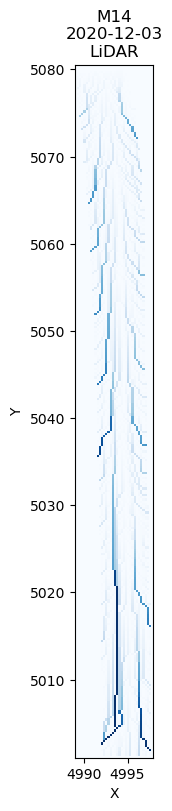

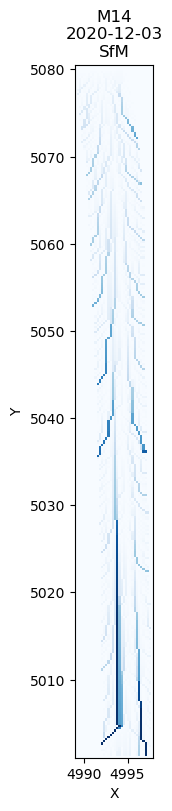

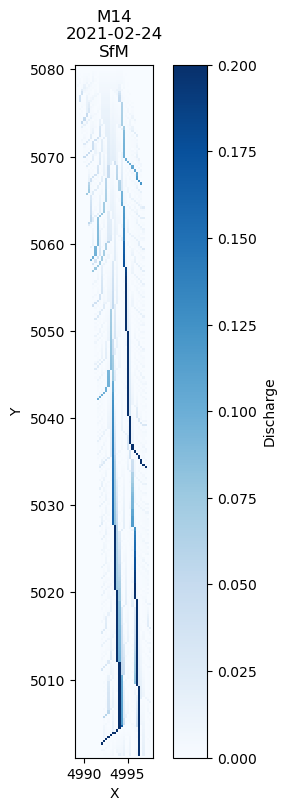

In [9]:
plt.figure(figsize=(5,9))
imshow_grid(mg_m14_20201203_lidar,'surface_water__discharge', plot_name = 'M14\n2020-12-03\nLiDAR', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

plt.figure(figsize=(5,9))
imshow_grid(mg_m14_20201203_sfm,'surface_water__discharge', plot_name = 'M14\n2020-12-03\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

plt.figure(figsize=(5,9))
imshow_grid(mg_m14_20210224_sfm,'surface_water__discharge', plot_name = 'M14\n2021-02-24\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, colorbar_label='Discharge')
plt.show();

# plt.figure(figsize=(5,9))
# imshow_grid(mg_m14_20220324_sfm,'surface_water__discharge', plot_name = 'M14\n2022-03-24\nSfM', \
#     cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
# plt.show();

# plt.figure(figsize=(5,9))
# imshow_grid(mg_m14_20220411_sfm,'surface_water__discharge', plot_name = 'M14\n2022-04-11\nSfM', \
#     cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
# plt.show();

# plt.figure(figsize=(5,9))
# imshow_grid(mg_m14_20220428_sfm,'surface_water__discharge', plot_name = 'M14\n2022-04-28\nSfM', \
#     cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
# plt.show();

# plt.figure(figsize=(5,9))
# imshow_grid(mg_m14_20220601_sfm,'surface_water__discharge', plot_name = 'M14\n2022-06-01\nSfM', \
#     cmap='Blues', vmin=0, vmax=0.2, colorbar_label='Discharge')
# plt.show();

In [10]:
area = mg_m14_20201203_lidar.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20201203_lidar.node_has_boundary_neighbor(mg_m14_20201203_lidar.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]

In [19]:
boundary_drainage_area

array([  6.25000000e-02,   1.00000000e+00,   1.87500000e-01,
         1.87500000e-01,   9.37500000e-01,   6.25000000e-02,
         6.25000000e-02,   9.37500000e-01,   2.06250000e+00,
         1.25000000e-01,   1.87500004e-01,   9.37500000e-01,
         5.00000000e-01,   2.75000000e+00,   6.25000000e-02,
         1.25000000e-01,   9.37500000e-01,   5.12500000e+00,
         6.25000000e-02,   2.50000000e-01,   6.87500000e-01,
         6.25000000e-02,   2.50000000e-01,   6.25000000e-02,
         1.25000000e-01,   2.50000000e-01,   1.98125000e+01,
         6.25000000e-02,   1.87500000e-01,   6.25000000e-02,
         6.25000000e-02,   6.66875000e+01,   1.25000000e-01,
         6.25000000e-02,   1.87500000e-01,   6.25000000e-02,
         1.87500000e-01,   6.25000000e-02,   2.50000000e-01,
         6.25000000e-02,   1.25000000e-01,   6.25000000e-02,
         1.87500000e-01,   6.25000000e-02,   1.87500000e-01,
         6.25000037e-02,   5.62500004e-01,   6.24999963e-02,
         1.25000000e-01,

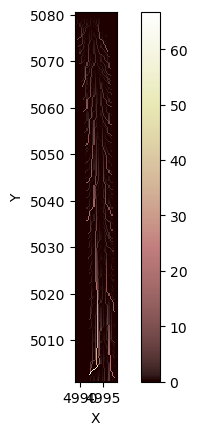

In [13]:
mg_m14_20201203_lidar.imshow(mg_m14_20201203_lidar.at_node['drainage_area'])

In [25]:
mask = np.zeros(len(mg_m14_20201203_lidar.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area

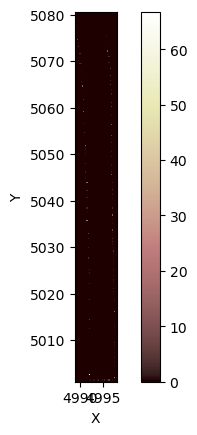

In [26]:
imshow_grid(mg_m14_20201203_lidar, mask)

In [29]:
mask.reshape(mg_m14_20201203_lidar.shape)

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
       